In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from mpl_toolkits import mplot3d
import stl
plt.rcParams['font.size']=7.5

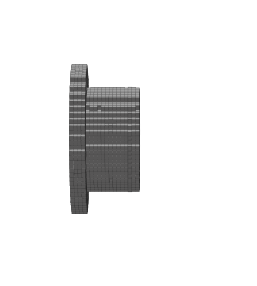

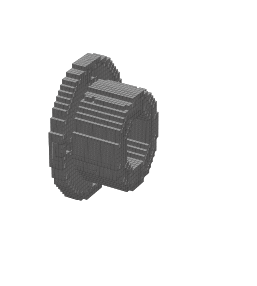

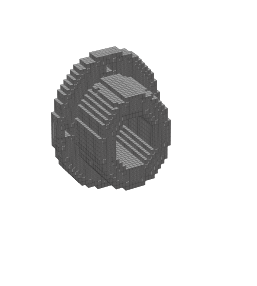

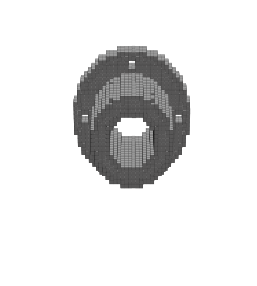

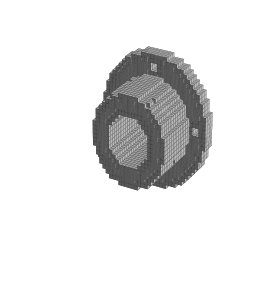

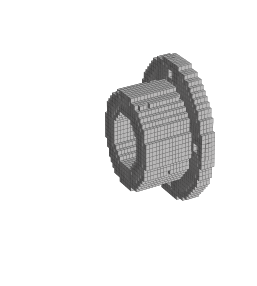

In [14]:
for i in range(0,180,30):
    fig = plt.figure(figsize=(20, 5))
    data1 = np.load(src1+files1[0])
    voxel = data1['x']

    ax = fig.add_subplot(142,projection='3d')
    ax.voxels(voxel,facecolors='#d0cfcf'
              ,edgecolors=(50 / 255, 50 / 255, 50 / 255)
              ,linewidths=0.1)

    ax.grid(False)
    ax.view_init(25,120)
    ax.axis('off')
    plt.show()

In [1]:
src0 = 'C:/Users/soyoung yoo/Desktop/parts1006_dataset/stl_object/'
src1 = 'C:/Users/soyoung yoo/Desktop/parts1006_dataset/voxel_npz/'
src2= 'C:/Users/soyoung yoo/Desktop/parts1006_dataset/point_npz/'
dst = 'C:/Users/soyoung yoo/Desktop/parts1006_dataset/total_fig/'

In [4]:
files0 = os.listdir(src0)
files1 = os.listdir(src1)
files2 = os.listdir(src2)
print(files1[0],files2[0],files0[0])

0_BTHR40.npz 0_BTHR40.npz 0_BTHR40.stl


In [8]:
def figure_save(files0,files1,files2,src0,src1,src2,dst):
    for j in range(2):
        
        print(files1[j],files2[j],files0[j])
        i = 40
        fig = plt.figure(figsize=(20, 5))
        filename = files0[j][:-4]
        stl_mesh = stl.mesh.Mesh.from_file(src0+files0[j])
        obj = mplot3d.art3d.Poly3DCollection(stl_mesh.vectors
                                         ,facecolors='#d0cfcf'
                                         ,edgecolors=(50 / 255, 50 / 255, 50 / 255)
                                         ,linewidths=0.1)

        ax = fig.add_subplot(141,projection='3d')
        ax.add_collection3d(obj)
        ax.grid(False)
        ax.view_init(25,i)
        # Auto scale to the mesh size
        scale = stl_mesh.points.flatten(-1)
        min,max =np.min(scale),np.max(scale)
        ax.set_ylim(min,max)
        ax.set_xlim(min,max)
        ax.set_zlim(min/2,max+(-min/2))
        ax.axis('off')
        
        
        data1 = np.load(src1+files1[j])
        voxel = data1['x']

        ax = fig.add_subplot(142,projection='3d')
        ax.voxels(voxel,facecolors='#d0cfcf'
                  ,edgecolors=(50 / 255, 50 / 255, 50 / 255)
                  ,linewidths=0.1)

        ax.grid(False)
        ax.view_init(25,-50)
        ax.axis('off')
        
        data2 = np.load(src2+files2[j])
        pointcloud = data2['points'].tolist()

        pnt_x,pnt_y,pnt_z=[],[],[]
        for j in range(2048):

            pnt_x.append(pointcloud[j][0])
            pnt_y.append(pointcloud[j][1])
            pnt_z.append(pointcloud[j][2])

        ax= fig.add_subplot(143,projection='3d')
        ax.view_init(25,i)
        max = np.max(pointcloud)
        min = np.min(pointcloud)
        ax.set_ylim(min,max)
        ax.set_xlim(min,max)
        ax.set_zlim(min/2,max+(-min/2))
        ax.grid(False)
        ax.scatter3D(pnt_x, pnt_y, pnt_z,c='#676565',marker='.')
        ax.axis('off')

        ax= fig.add_subplot(144,projection='3d')
        ax.view_init(90,i)
        max = np.max(pointcloud)
        min = np.min(pointcloud)
        ax.set_ylim(min,max)
        ax.set_xlim(min,max)
        ax.set_zlim(min/2,max+(-min/2))
        ax.grid(False)
        ax.scatter3D(pnt_x, pnt_y, pnt_z,c='#474444',marker='.')
        ax.axis('off')

        dst =dst
        
        #plt.savefig(dst+filename+'.png', dpi=100)
        
        plt.show()

0_BTHR40.npz 0_BTHR40.npz 0_BTHR40.stl


C:\Users\soyoung yoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


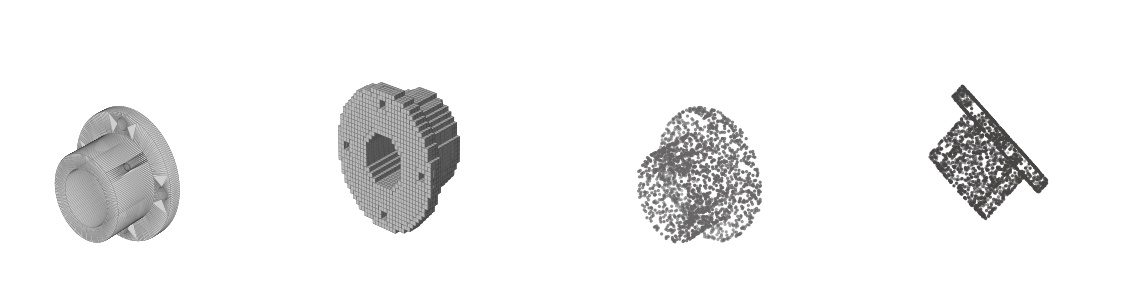

1000_FWSRC-D20-V2-E3-T10.0.npz 1000_FWSRC-D20-V2-E3-T10.0.npz 1000_FWSRC-D20-V2-E3-T10.0.stl


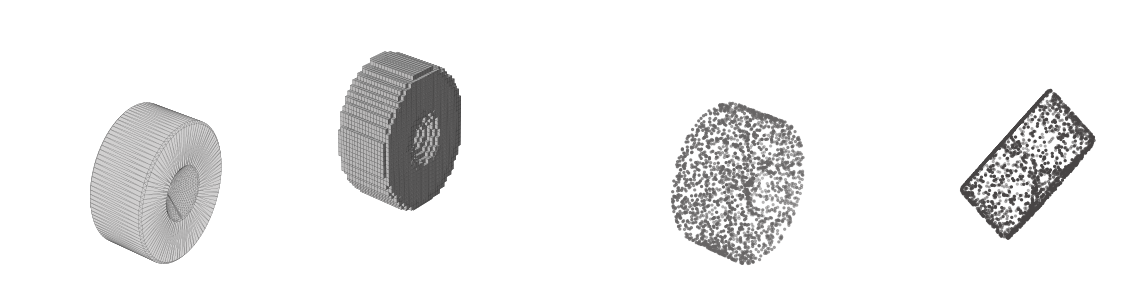

In [9]:
figure_save(files0,files1,files2,src0,src1,src2,dst)